In [6]:
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import numpy as np

from IPython import display
import matplotlib.pyplot as plt

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

In [2]:
# Fetch data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert uint8 pixel values to float32 in the range [0, 1] (for sigmoid)
X_test = X_test.astype('float32')
X_test /= 255

# Verify data
print X_test.shape, y_test.shape

(10000, 32, 32, 3) (10000, 1)


In [ ]:
for epoch in [50, 100, 150, 200, 250, 300, 350, 400]:
    discriminator = load_model("networks/disc9-" + str(epoch) + ".h5")
    preds = discriminator.predict(X_test)
    
    accuracy = 0
    for y, pred in zip(y_test, preds):
        if y == np.argmax(pred) % 10:
            accuracy += 1
    accuracy /= 1. * len(preds)

    print "Epoch {:d} test accuracy: {:.4f}".format(epoch, accuracy)

Epoch 50 generated images:


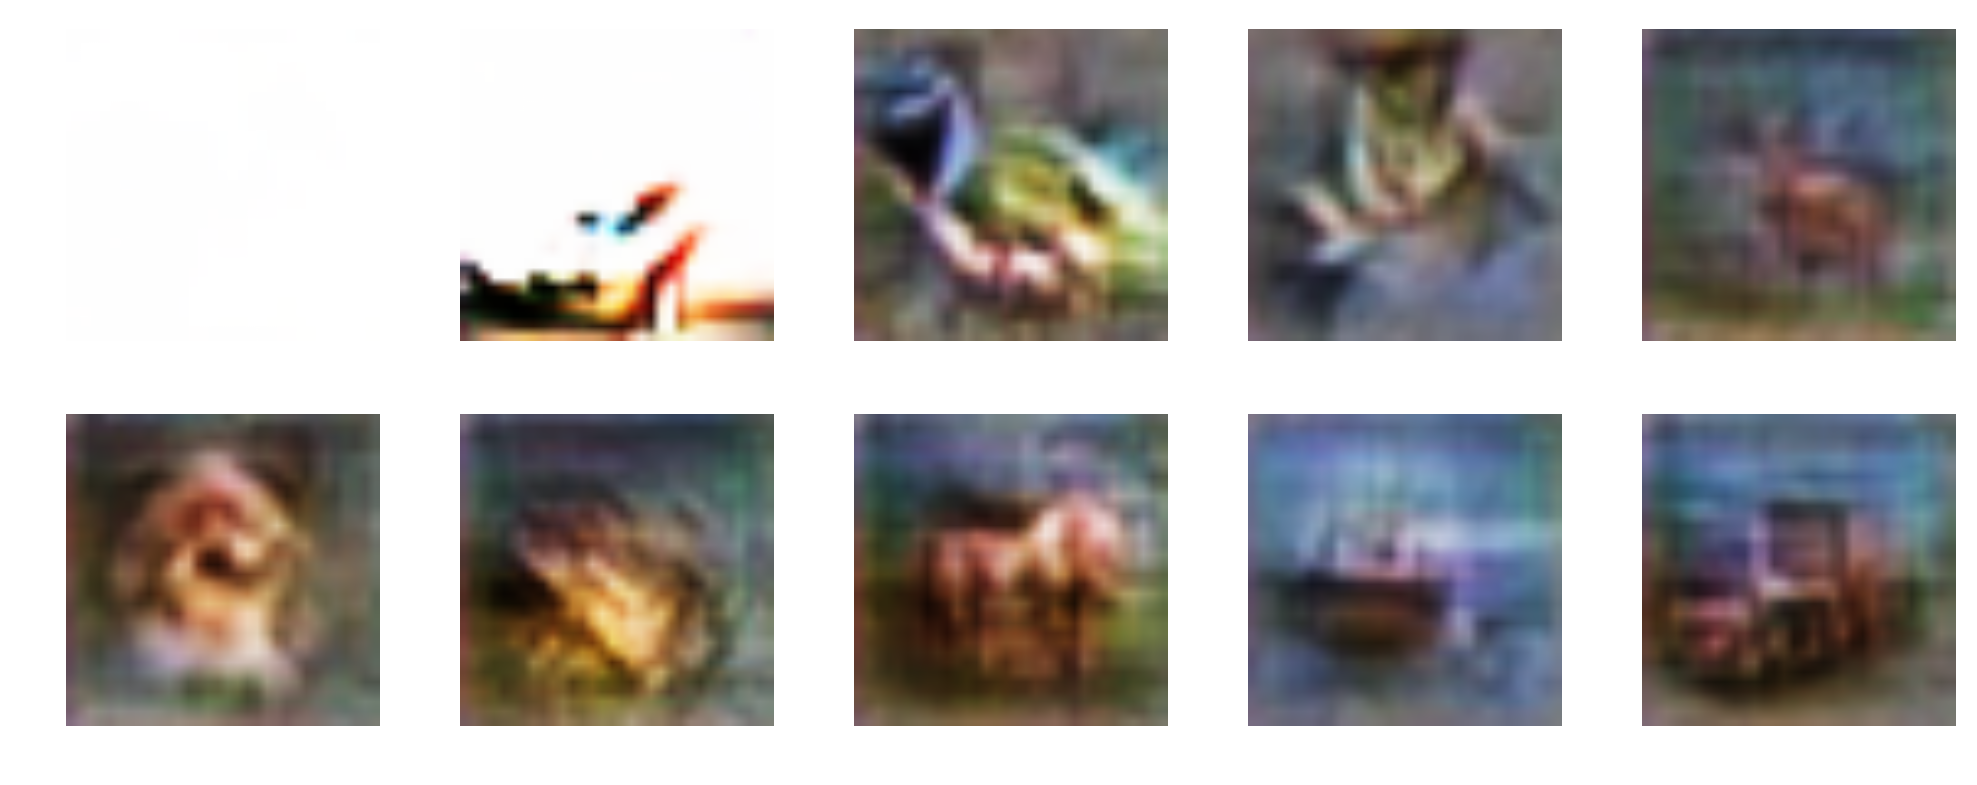

Epoch 100 generated images:


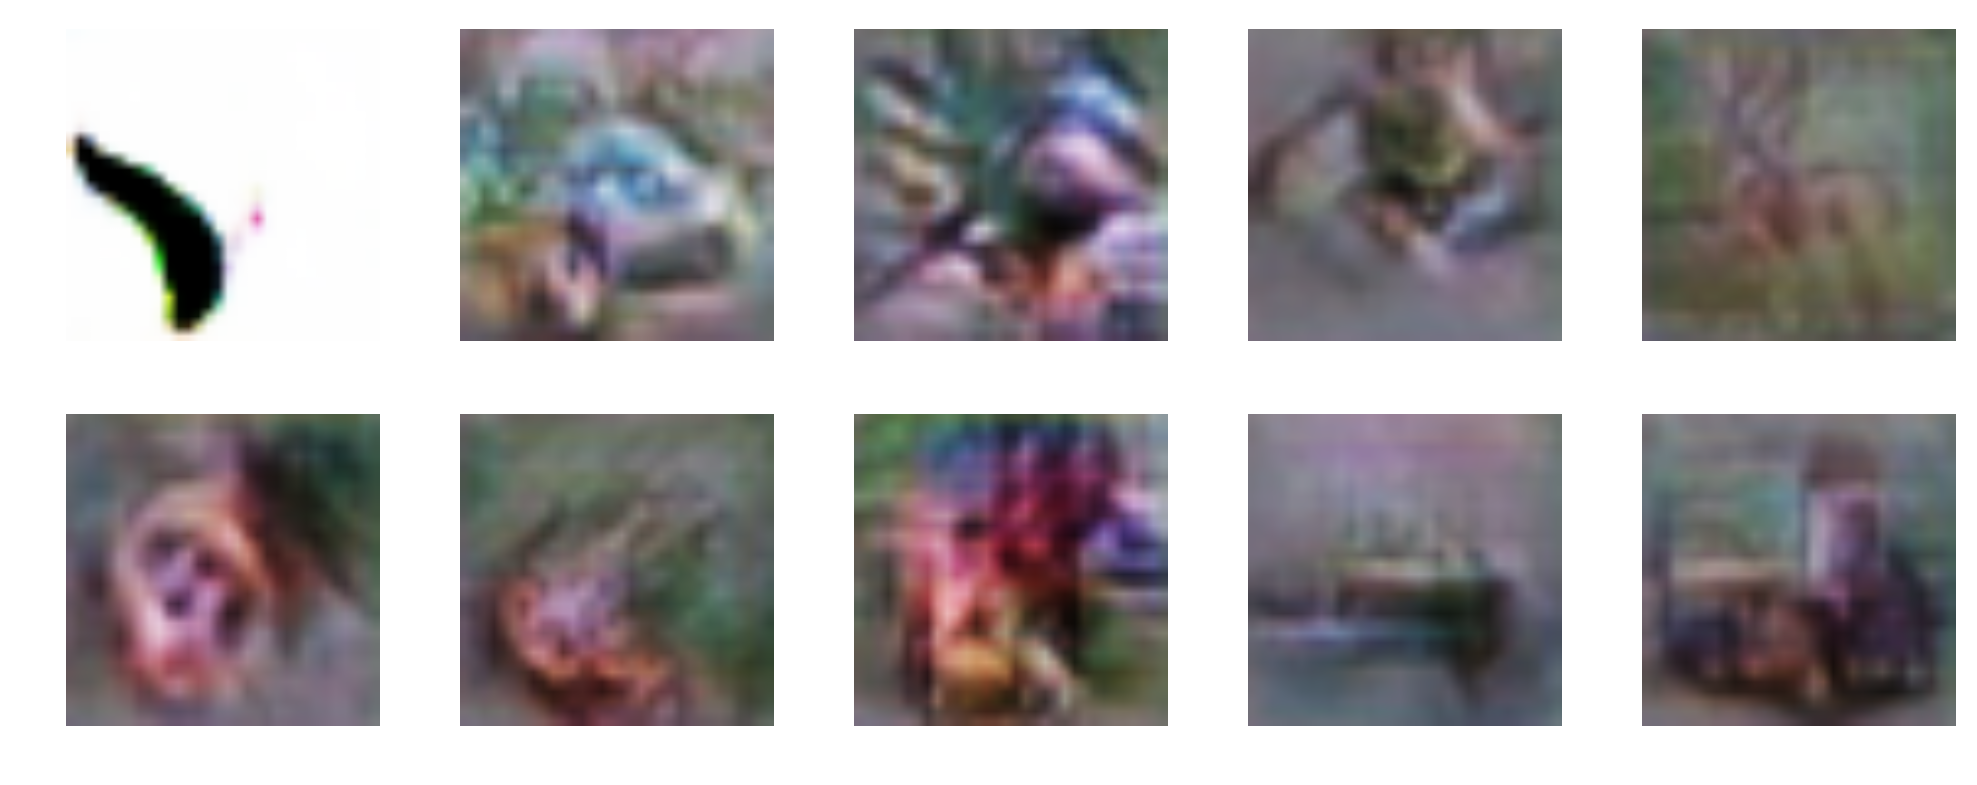

Epoch 150 generated images:


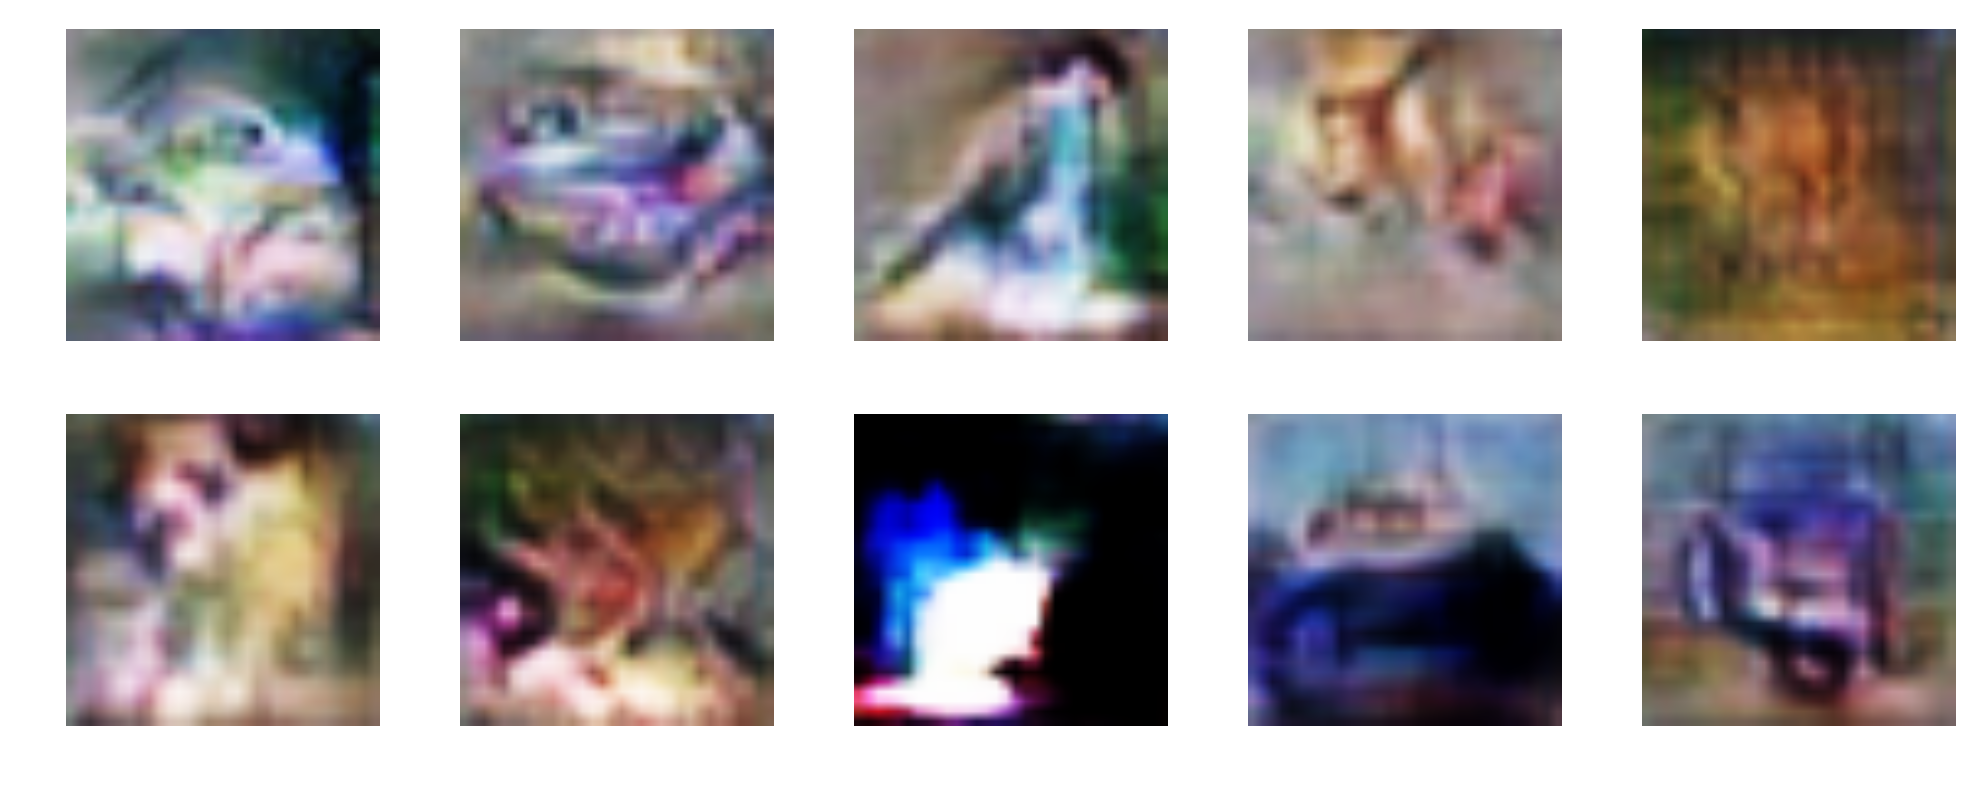

Epoch 200 generated images:


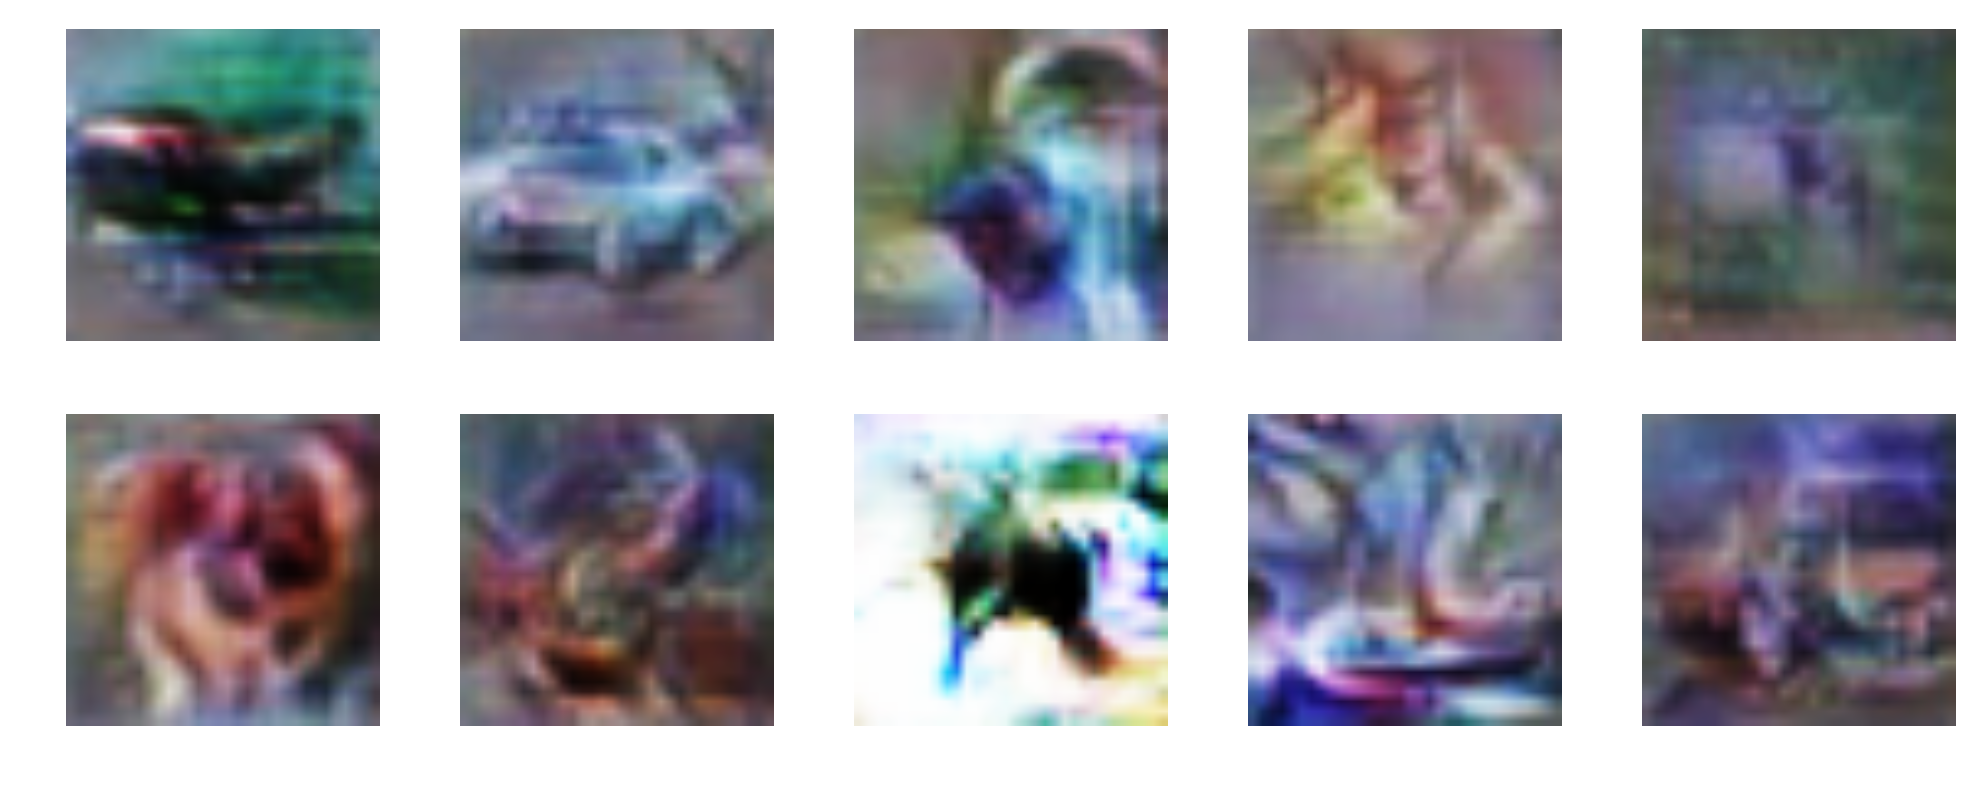

Epoch 250 generated images:


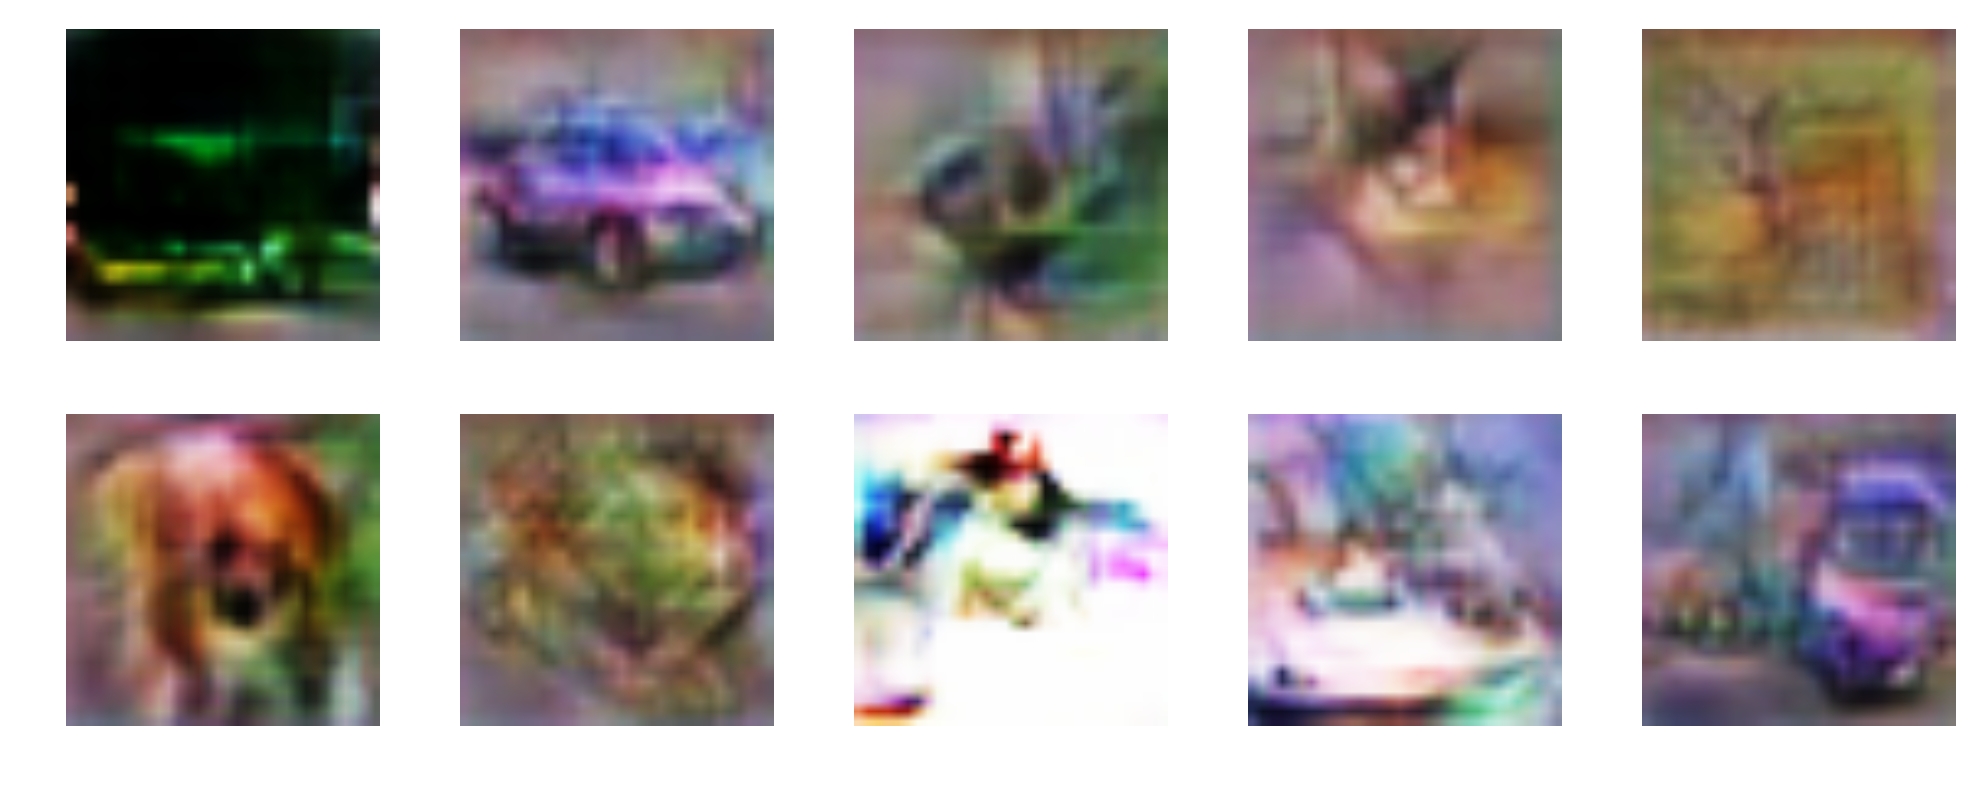

Epoch 300 generated images:


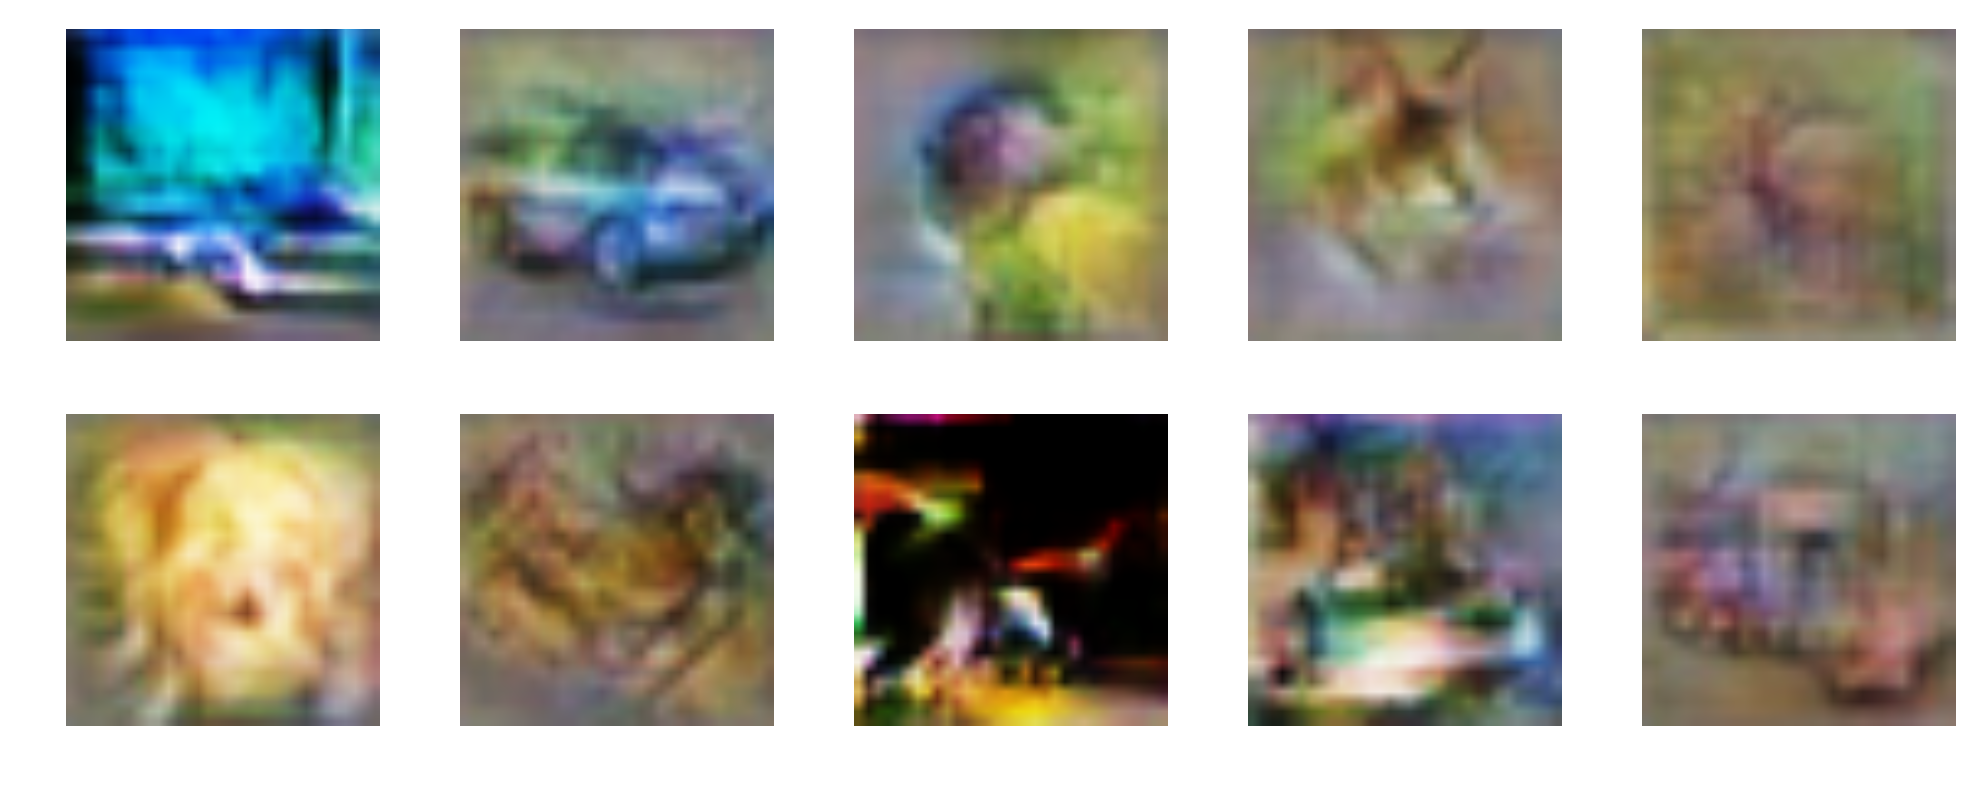

Epoch 350 generated images:


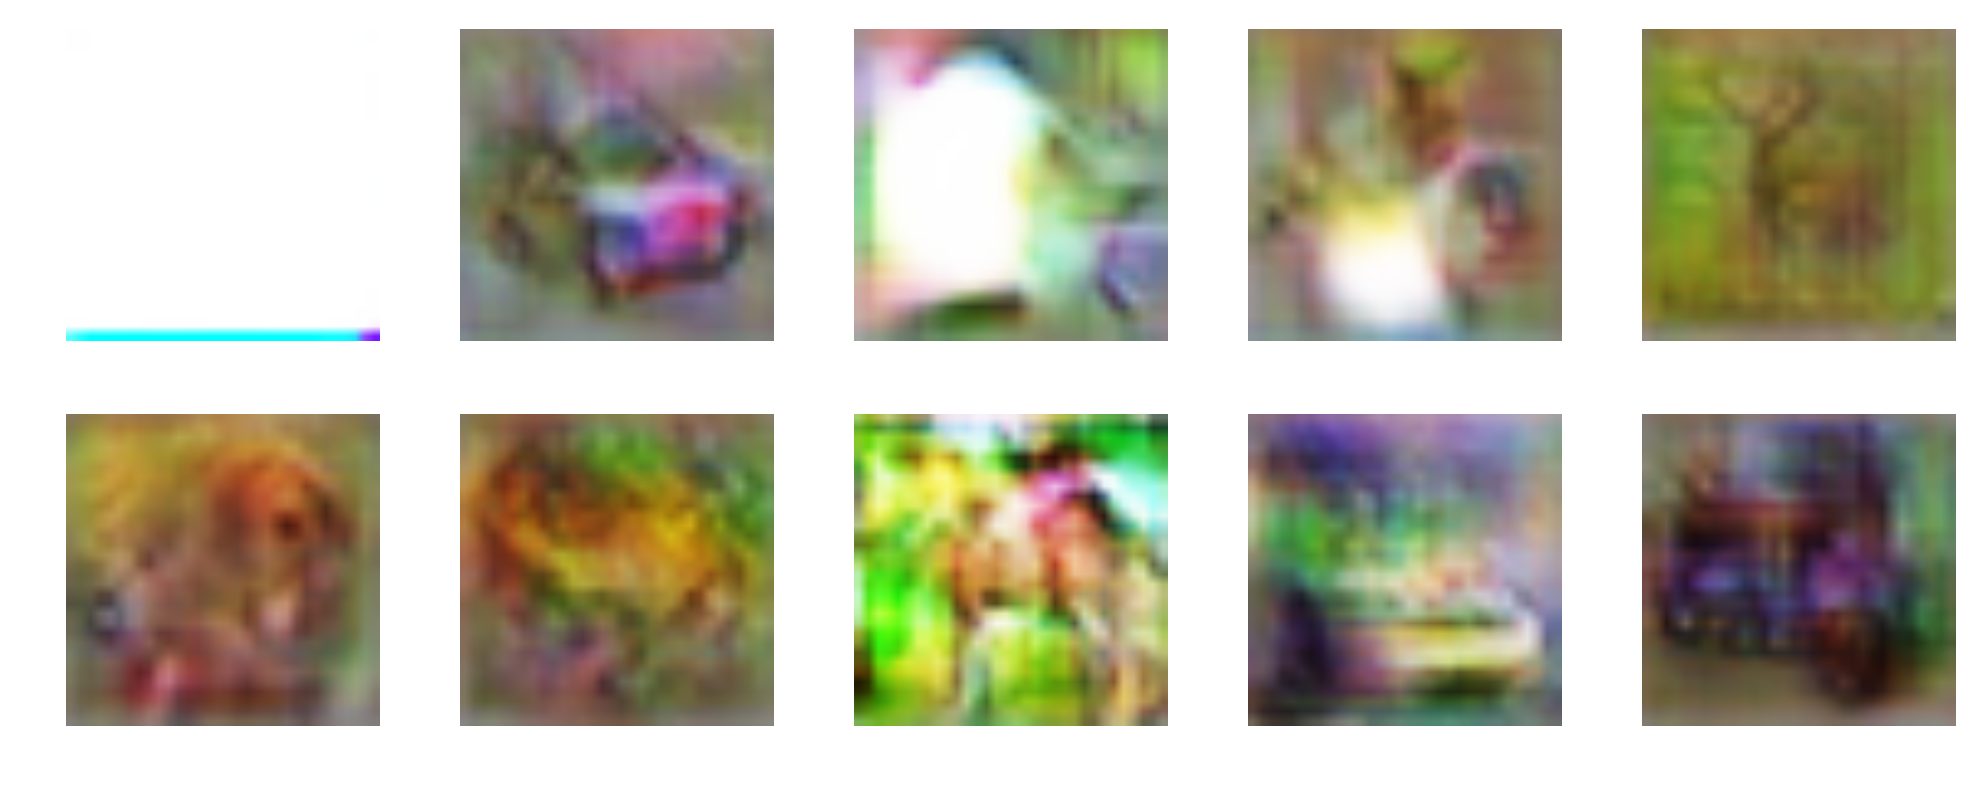

Epoch 400 generated images:


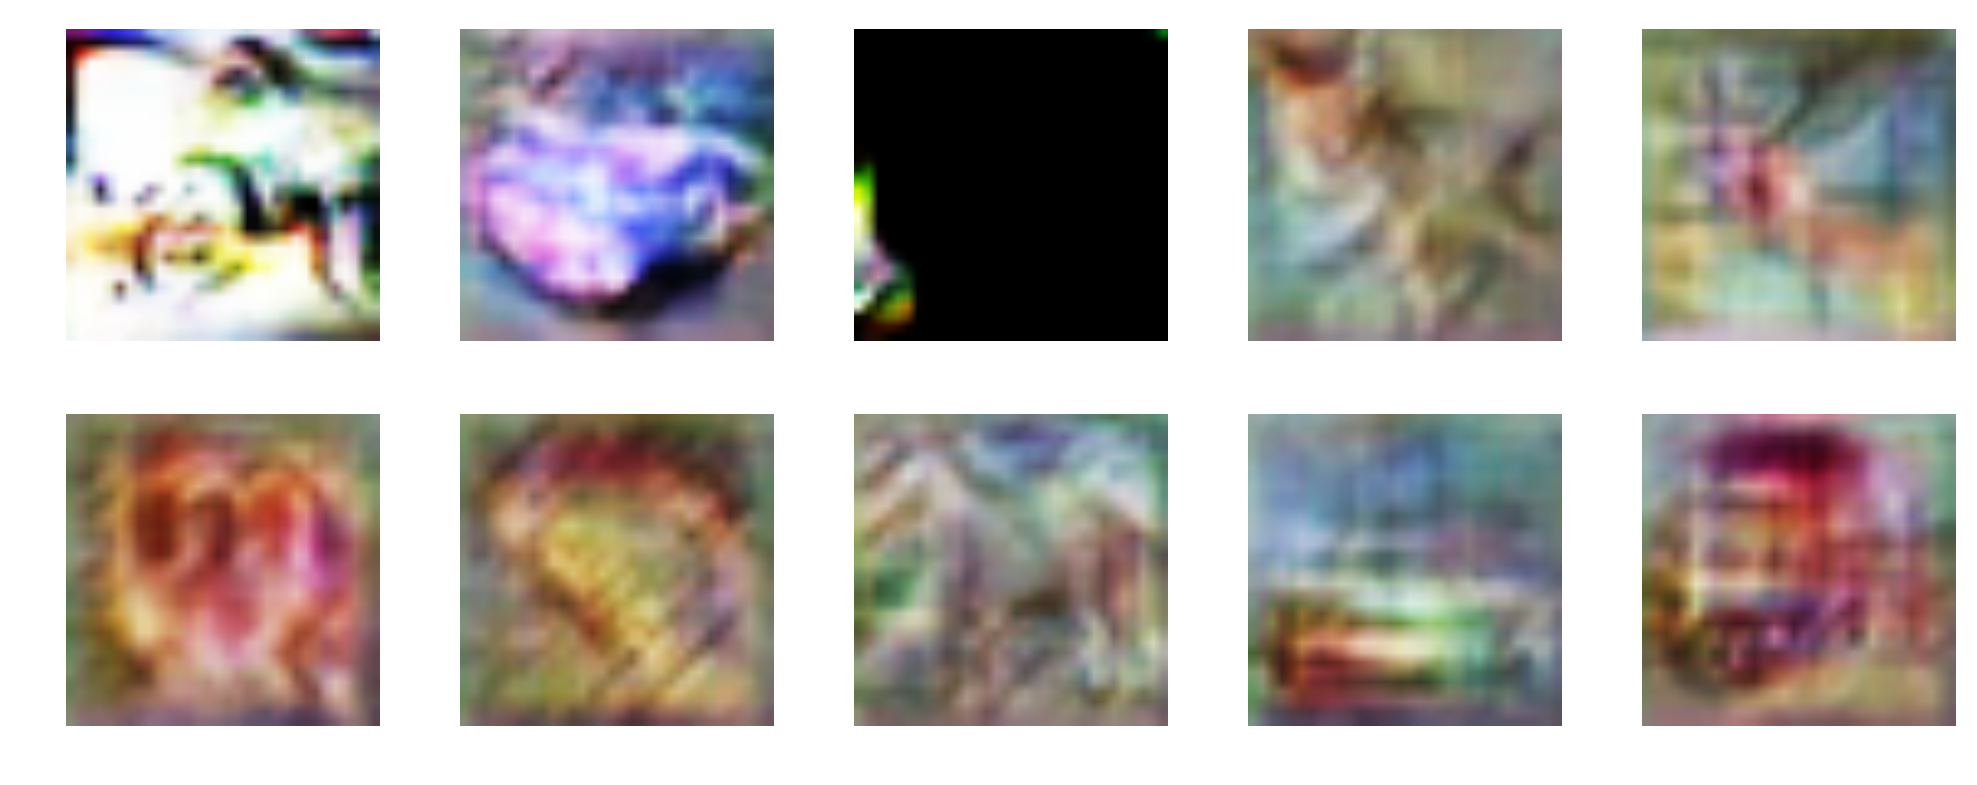

In [16]:
for epoch in [50, 100, 150, 200, 250, 300, 350, 400]:
    generator = load_model("networks/gen9-" + str(epoch) + ".h5")
    
    noise = np.zeros([10, 100])
    for image_class in range(10):
        start_col = image_class * 10
        end_col = (image_class + 1) * 10
        noise[image_class, start_col:end_col] = np.random.uniform(0, 1, size=[1, 10])
        
    generated_images = generator.predict(noise)
    
    print "Epoch {:d} generated images:".format(epoch)

    plt.figure(figsize=(10, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(2, 5, i+1)
        img = generated_images[i,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()